In [1]:
import hyperspy.api as hs
import numpy as np
import os

from pathlib import Path

In [2]:
base_dir = Path.cwd()

In [3]:
os.listdir(base_dir)
signal_paths = list(base_dir.glob('*.emd'))

# Hyperspy Section

## What HyperSpy Is Built For:
Handling n-dimensional data (e.g., 2D images with 1D spectra at each pixel).

Interactive visualization and analysis.

Model fitting and decomposition (e.g., PCA, ICA, NMF).

Export/import to/from common microscopy formats (e.g., .emd, .hdf5, .blo, etc.).

## Core Concept: Signal
At the heart of HyperSpy is the Signal class and its sub-classes. Think of a Signal as an enhanced NumPy array with metadata and built-in methods tailored for analysis.

### Key Signal Types:
Signal1D: For 1D spectra (e.g., EELS, EDX).

Signal2D: For 2D images.

ComplexSignal1D, ComplexSignal2D: Handle complex-valued data.

Signal3D, etc.: For higher-dimensional data.

## Useful Functions & Features:
1. Loading Data
import hyperspy.api as hs
s = hs.load("myfile.dm3")
Automatically detects the signal type and loads metadata.

2. Plotting
s.plot()
Opens an interactive GUI viewer — zoom, pan, and slice multi-dimensional data easily.

3. Slicing and Navigation
s.inav[10, 15]  # Access spectrum at pixel (10,15)
4. Data Processing


        s.decomposition() – Run PCA/ICA/NMF for dimensionality reduction.

        s.estimate_noise_variance() – Estimate noise, important for denoising or fitting.

        s.align2D() – Align images in a 2D signal.


5. Model Fitting
s.create_model()
You can create a fitting model to extract quantitative data from spectra (e.g., Gaussian peak fitting, power-law background subtraction).

6. Exporting
s.save("processed.hspy")

In [4]:
signal1 = hs.load(signal_paths[0])

In [5]:
signal1

[<EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <Signal2D, title: Al, dimensions: (|400, 400)>,
 <Signal2D, title: Si, dimensions: (|400, 400)>,
 <Signal2D, title: Na, dimensions: (|400, 400)>,
 <Signal2D, title: K, dimensions: (|400, 400)>,
 <Signal2D, title: Ba, dimensions: (|400, 400)>,
 <Signal2D, title: HAADF, dimensions: (|400, 400)>,
 <Signal2D, title: Fe, dimensions: (|400, 400)>,
 <Signal2D, title: Rb, dimensions: (|400, 400)>,
 <Signal2D, title: O, dimensions: (|400, 400)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (400, 400|4096)>]

In [6]:
type(signal1[0])

exspy.signals.eds_tem.EDSTEMSpectrum

In [7]:
type(signal1[0].data)

numpy.ndarray

In [8]:
signal1[0].data

array([0, 0, 0, ..., 0, 0, 0], shape=(4096,), dtype=uint32)

In [9]:
signal1[0].data.shape

(4096,)

In [10]:
type(signal1[0].metadata)

hyperspy.misc.utils.DictionaryTreeBrowser

In [11]:
signal1[0].metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = np.float64(0.0)
│       │   ├── tilt_beta = np.float64(0.0)
│       │   ├── x = -3.5e-05
│       │   ├── y = -0.000571
│       │   └── z = -8e-05
│       ├── beam_energy = 60.0
│       ├── camera_length = 196.0
│       ├── magnification = 28500.0
│       └── microscope = Titan
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.3.0
│   │       ├── io_plugin = rsciio.emd
│   │       ├── operation = load
│   │       └── timestamp = 2025-07-27T14:21:27.537466-07:00
│   ├── date = 2024-10-16
│   ├── original_filename = Copy of SI HAADF 1059 49000 x.emd
│   ├── time = 10:59:27-07:00
│   ├── time_zone = Pacific Daylight Time
│   └── title = EDS
├── Sample
│   └── elements = ['O', 'Na', 'Al', 'Si', 'K', 'Fe', 'Rb', 'Ba']
└── Signal
    └── signal_type = EDS_TEM

In [12]:
signal1[0].original_metadata

├── Acquisition
│   ├── AcquisitionDatetime
│   │   └── DateTime = 0
│   ├── AcquisitionStartDatetime
│   │   └── DateTime = 1729101567
│   ├── BeamType = 
│   └── SourceType = XFEG
├── BinaryResult
│   ├── AcquisitionUnit = 
│   ├── CompositionType = 
│   ├── Detector = SuperXG21
│   ├── Encoding = 
│   ├── Offset
│   │   ├── x = -4.3064634577704011e-07
│   │   └── y = -3.8658020806962206e-07
│   ├── PixelSize
│   │   ├── height = 2.0030062594280935e-09
│   │   └── width = 2.0030062594280935e-09
│   ├── PixelUnitX = m
│   └── PixelUnitY = m
├── Core
│   ├── MetadataDefinitionVersion = 7.9
│   ├── MetadataSchemaVersion = v1/2013/07
│   └── guid = 00000000000000000000000000000000
├── CustomProperties
│   ├── Aperture[C1].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[C2].Name
│   │   ├── type = string
│   │   └── value = 70
│   ├── Aperture[C3].Name
│   │   ├── type = string
│   │   └── value = None
│   ├── Aperture[OBJ].Name
│   │   ├── type = string
│   │   └── value = None
│   ├── Aperture[SA].Name
│   │   ├── type = string
│   │   └── value = None
│   ├── Detectors[SuperXG21].BilatThresholdHi
│   │   ├── type = double
│   │   └── value = 0.0032147053407600001
│   ├── Detectors[SuperXG21].KMax
│   │   ├── type = double
│   │   └── value = 180
│   ├── Detectors[SuperXG21].KMin
│   │   ├── type = double
│   │   └── value = 120
│   ├── Detectors[SuperXG21].PulsePairResolutionTime
│   │   ├── type = double
│   │   └── value = 4.9999999999999998e-07
│   ├── Detectors[SuperXG21].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 120
│   ├── Detectors[SuperXG22].BilatThresholdHi
│   │   ├── type = double
│   │   └── value = 0.00326511849443
│   ├── Detectors[SuperXG22].KMax
│   │   ├── type = double
│   │   └── value = 180
│   ├── Detectors[SuperXG22].KMin
│   │   ├── type = double
│   │   └── value = 120
│   ├── Detectors[SuperXG22].PulsePairResolutionTime
│   │   ├── type = double
│   │   └── value = 4.9999999999999998e-07
│   ├── Detectors[SuperXG22].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 120
│   ├── Detectors[SuperXG23].BilatThresholdHi
│   │   ├── type = double
│   │   └── value = 0.0033984540623399999
│   ├── Detectors[SuperXG23].KMax
│   │   ├── type = double
│   │   └── value = 180
│   ├── Detectors[SuperXG23].KMin
│   │   ├── type = double
│   │   └── value = 120
│   ├── Detectors[SuperXG23].PulsePairResolutionTime
│   │   ├── type = double
│   │   └── value = 4.9999999999999998e-07
│   ├── Detectors[SuperXG23].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 120
│   ├── Detectors[SuperXG24].BilatThresholdHi
│   │   ├── type = double
│   │   └── value = 0.0032734815945800002
│   ├── Detectors[SuperXG24].KMax
│   │   ├── type = double
│   │   └── value = 180
│   ├── Detectors[SuperXG24].KMin
│   │   ├── type = double
│   │   └── value = 120
│   ├── Detectors[SuperXG24].PulsePairResolutionTime
│   │   ├── type = double
│   │   └── value = 4.9999999999999998e-07
│   ├── Detectors[SuperXG24].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 120
│   ├── Scan.ScanTransformation.A11
│   │   ├── type = double
│   │   └── value = 1
│   ├── Scan.ScanTransformation.A12
│   │   ├── type = double
│   │   └── value = 0
│   ├── Scan.ScanTransformation.A13
│   │   ├── type = double
│   │   └── value = 0.028229245916008949
│   ├── Scan.ScanTransformation.A21
│   │   ├── type = double
│   │   └── value = 0
│   ├── Scan.ScanTransformation.A22
│   │   ├── type = double
│   │   └── value = 1
│   ├── Scan.ScanTransformation.A23
│   │   ├── type = double
│   │   └── value = 0.040657088160514832
│   └── StemMagnification
│       ├── type = double
│       └── value = 28500
├── Detectors
│   ├── Detector-0
│   │   ├── CollectionAngleRange
│   │   │   ├── begin = 0
│   │   │   └── end = 0
│   │   ├── DetectorName = BF
│   │   ├── DetectorType = ScanningDetector
│   │   ├── Enabled = true
│   │   ├── Gain = 1
│   │   ├── Inserted = false
│   │   └── Offset = 

### Axes Manager stores the information necessary to get the frequency of data stored by the EDSTEM Spectrum
frequency = offset + scale * index  
reversing:  
index = (frequency - offset) / scale

In [13]:
type(signal1[0].axes_manager)

hyperspy.axes.AxesManager

In [14]:
signal1[0].axes_manager

Signal axis name,size,,offset,scale,units
Energy,4096,,-1.0,0.01,keV


In [15]:
signal1[13].axes_manager[2]

<X-ray energy axis, size: 4096>

In [16]:
signal1[0].axes_manager[0].offset

-1.0

In [17]:
signal1[0].axes_manager[0].scale

0.01

In [18]:
signal1[0].axes_manager[0].units

'keV'

In [19]:
signal1[13]

<EDSTEMSpectrum, title: EDS, dimensions: (400, 400|4096)>

In [20]:
signal1[13].data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
signal1[13].data.shape

(400, 400, 4096)

In [22]:
 signal1[13].axes_manager.signal_axes[0].axis

array([-1.  , -0.99, -0.98, ..., 39.93, 39.94, 39.95], shape=(4096,))

In [23]:
 signal1[13].axes_manager.signal_axes[0].axis[0]

np.float64(-1.0)

In [24]:
 signal1[13].axes_manager.signal_axes[0].axis['-1.']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
summed_signal = signal1[13].sum().data
summed_signal

In [25]:
for index in summed_signal:
    print(index)

NameError: name 'summed_signal' is not defined

In [26]:
signal1[13].metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       └── number_of_frames = 200
│       ├── Stage
│       │   ├── tilt_alpha = np.float64(0.0)
│       │   ├── tilt_beta = np.float64(0.0)
│       │   ├── x = -3.5e-05
│       │   ├── y = -0.000571
│       │   └── z = -8e-05
│       ├── beam_energy = 60.0
│       ├── camera_length = 196.0
│       ├── magnification = 28500.0
│       └── microscope = Titan
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.3.0
│   │       ├── io_plugin = rsciio.emd
│   │       ├── operation = load
│   │       └── timestamp = 2025-07-27T14:21:27.722327-07:00
│   ├── date = 2024-10-16
│   ├── original_filename = Copy of SI HAADF 1059 49000 x.emd
│   ├── time = 10:59:27-07:00
│   ├── time_zone = Pacific Daylight Time
│   └── title = EDS
├── Sample
│   └── elements = ['O', 'Na', 'Al', 'Si', 'K', 'Fe', 'Rb', 'Ba']
└── Signal
    └── signal_type = EDS_TEM

## Hyperspy signal Axis Manager

In [27]:
axes_manager = signal1[13].axes_manager
axes_manager

Navigation axis name,size,index,offset,scale,units
x,400,0,-430.64634577704004,2.0030062594280933,nm
y,400,0,-386.580208069622,2.0030062594280933,nm
Signal axis name,size,,offset,scale,units
X-ray energy,4096,,-1.0,0.01,keV


In [28]:
dir(axes_manager[2])

['__base_traits__',
 '__class__',
 '__class_traits__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instance_traits__',
 '__le__',
 '__listener_traits__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__observer_traits__',
 '__prefix_trait__',
 '__prefix_traits__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__view_traits__',
 '__weakref__',
 '_add_class_trait',
 '_class_traits',
 '_convert_compact_units',
 '_convert_units',
 '_each_trait_method',
 '_flush_traits_cache',
 '_get_array_slices',
 '_get_index',
 '_get_instance_handlers',
 '_get_name',
 '_get_positive_index',
 '_get_quantity',
 '_get_sync_trait_info',
 '_get_value_from_value_with_units',
 '_ignore_conversion',
 '_index_changed',
 '_init_trait_delegate_listener',


In [29]:
axes_manager[2].name

'X-ray energy'

In [30]:
axes_manager[2].axis[20]

np.float64(-0.8)

In [31]:
dir(signal1[13].axes_manager)

['__base_traits__',
 '__class__',
 '__class_traits__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instance_traits__',
 '__iter__',
 '__le__',
 '__listener_traits__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__observer_traits__',
 '__prefix_trait__',
 '__prefix_traits__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__traits_listener__',
 '__view_traits__',
 '__weakref__',
 '_add_class_trait',
 '_am_indices_generator',
 '_append_axis',
 '_array_indices_generator',
 '_axes',
 '_axes',
 '_axes_getter',
 '_class_traits',
 '_convert_axes_to_same_units',
 '_each_trait_method',
 '_flush_traits_cache',
 '_get_axes_dicts',
 '_get_axes_in_natural_order',
 '_get_axis_attribute_valu

In [32]:
signal1[13].axes_manager._signal_axes.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [33]:
dir(signal1[13].axes_manager._axes_getter)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [34]:
signal1[13].axes_manager._axes_getter

<bound method AxesManager._axes_getter of <Axes manager, axes: (400, 400|4096)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |    400 |      0 | -4.3e+02 |       2 |     nm 
               y |    400 |      0 | -3.9e+02 |       2 |     nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
    X-ray energy |   4096 |      0 |      -1 |    0.01 |    keV >

In [36]:
dir(signal1[13].axes_manager._signal_axes)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [37]:
signal1[13].axes_manager[0]

<x axis, size: 400, index: 0>

In [38]:
signal1[13].axes_manager[0].axis

array([-430.64634578, -428.64333952, -426.64033326, -424.637327  ,
       -422.63432074, -420.63131448, -418.62830822, -416.62530196,
       -414.6222957 , -412.61928944, -410.61628318, -408.61327692,
       -406.61027066, -404.6072644 , -402.60425815, -400.60125189,
       -398.59824563, -396.59523937, -394.59223311, -392.58922685,
       -390.58622059, -388.58321433, -386.58020807, -384.57720181,
       -382.57419555, -380.57118929, -378.56818303, -376.56517677,
       -374.56217051, -372.55916425, -370.55615799, -368.55315173,
       -366.55014548, -364.54713922, -362.54413296, -360.5411267 ,
       -358.53812044, -356.53511418, -354.53210792, -352.52910166,
       -350.5260954 , -348.52308914, -346.52008288, -344.51707662,
       -342.51407036, -340.5110641 , -338.50805784, -336.50505158,
       -334.50204532, -332.49903907, -330.49603281, -328.49302655,
       -326.49002029, -324.48701403, -322.48400777, -320.48100151,
       -318.47799525, -316.47498899, -314.47198273, -312.46897

In [39]:
signal1[13].axes_manager[0].offset

-430.64634577704004

In [40]:
signal1[13].axes_manager[2].offset

-1.0

In [41]:
signal1[13].axes_manager[2].scale

0.01

In [42]:
signal1[13].axes_manager[2].units

'keV'

In [43]:
signal1[13].axes_manager[1].axis

array([-386.58020807, -384.57720181, -382.57419555, -380.57118929,
       -378.56818303, -376.56517677, -374.56217051, -372.55916425,
       -370.55615799, -368.55315173, -366.55014548, -364.54713922,
       -362.54413296, -360.5411267 , -358.53812044, -356.53511418,
       -354.53210792, -352.52910166, -350.5260954 , -348.52308914,
       -346.52008288, -344.51707662, -342.51407036, -340.5110641 ,
       -338.50805784, -336.50505158, -334.50204532, -332.49903907,
       -330.49603281, -328.49302655, -326.49002029, -324.48701403,
       -322.48400777, -320.48100151, -318.47799525, -316.47498899,
       -314.47198273, -312.46897647, -310.46597021, -308.46296395,
       -306.45995769, -304.45695143, -302.45394517, -300.45093891,
       -298.44793265, -296.4449264 , -294.44192014, -292.43891388,
       -290.43590762, -288.43290136, -286.4298951 , -284.42688884,
       -282.42388258, -280.42087632, -278.41787006, -276.4148638 ,
       -274.41185754, -272.40885128, -270.40584502, -268.40283

In [44]:
signal1[13].axes_manager[1]

<y axis, size: 400, index: 0>

In [45]:
signal1[13].axes_manager[2]

<X-ray energy axis, size: 4096>

## Using the axes_manager[2] to access the spectrum dimension, then using axis we can get the data as it is meant to be displayed in keV's

In [46]:
signal1[13].axes_manager[2].axis

array([-1.  , -0.99, -0.98, ..., 39.93, 39.94, 39.95], shape=(4096,))

In [47]:
signal1[13].isig[0.50:4]

<EDSTEMSpectrum, title: EDS, dimensions: (400, 400|0)>

In [48]:
signal1[13].isig[0.50:0.9].data

array([[[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 3, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 2, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 2, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

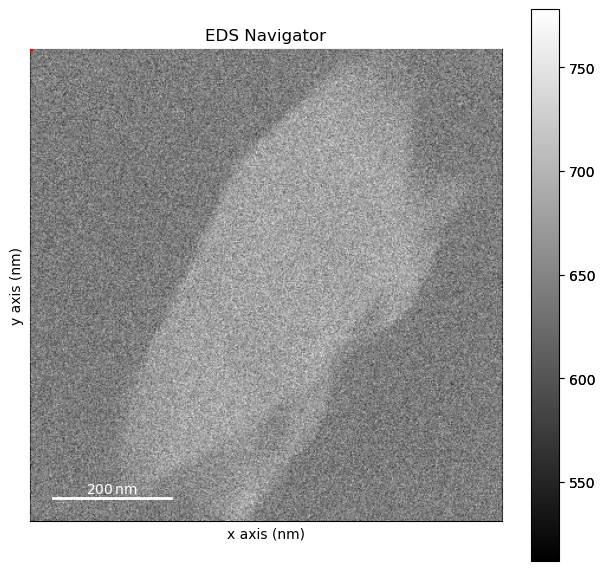

In [49]:
image_2d = signal1[13].sum(signal1[13].axes_manager.signal_axes)
image_2d.plot()

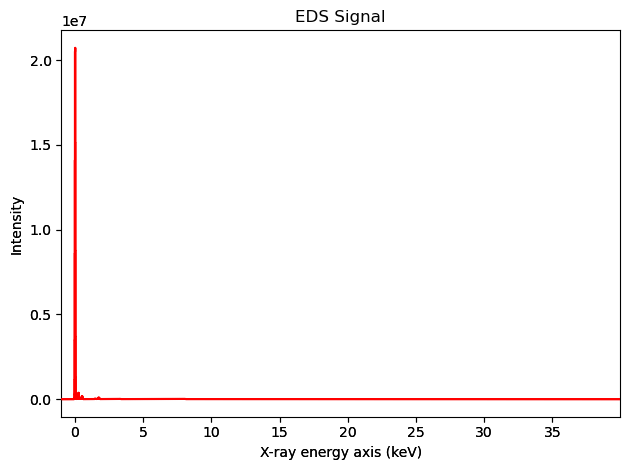

In [50]:
signal1[13].sum(signal1[13].axes_manager.navigation_axes).plot()

### Testing always getting the 3rd axis (Assuming third is always signal)

In [61]:
signal_axes = signal1[13].axes_manager[2]

In [62]:
signal_axes

<X-ray energy axis, size: 4096>

In [63]:
print(f"Name: {signal_axes.name}, Scale: {signal_axes.scale}, Units: {signal_axes.units}, Size: {signal_axes.size}")

Name: X-ray energy, Scale: 0.01, Units: keV, Size: 4096


In [64]:
print(dir(signal_axes))

['__base_traits__', '__class__', '__class_traits__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__instance_traits__', '__le__', '__listener_traits__', '__lt__', '__module__', '__ne__', '__new__', '__observer_traits__', '__prefix_trait__', '__prefix_traits__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__view_traits__', '__weakref__', '_add_class_trait', '_class_traits', '_convert_compact_units', '_convert_units', '_each_trait_method', '_flush_traits_cache', '_get_array_slices', '_get_index', '_get_instance_handlers', '_get_name', '_get_positive_index', '_get_quantity', '_get_sync_trait_info', '_get_value_from_value_with_units', '_ignore_conversion', '_index_changed', '_init_trait_delegate_listener', '_init_trait_event_listener', '_init_trait_listeners',

In [65]:
signal_axes.value2index(6.3)

730

In [66]:
signal_axes.value_range_to_indices(6.3, 7.4)

(730, 840)

In [74]:
traits = signal_axes.visible_traits()

In [75]:
for trait in traits:
    print(trait)

name
units
size
low_value
high_value
value
low_index
high_index
slice
navigate
is_binned
index
axis
scale
offset
events
_suppress_value_changed_trigger
_suppress_update_value
axes_manager
_is_uniform


In [77]:
traits

AttributeError: 'list' object has no attribute 'name'

### Testing accessing signal axis directly

In [55]:
signal_axes = signal1[13].axes_manager.signal_axes

In [56]:
signal_axes

(<X-ray energy axis, size: 4096>,)

In [57]:
signal_axes[0]

<X-ray energy axis, size: 4096>

In [58]:
for axis in signal_axes:
    print(f"Name: {axis.name}, Scale: {axis.scale}, Units: {axis.units}, Size: {axis.size}")

Name: X-ray energy, Scale: 0.01, Units: keV, Size: 4096


In [60]:
for axis in signal_axes:
    print(dir(axis))

['__base_traits__', '__class__', '__class_traits__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__instance_traits__', '__le__', '__listener_traits__', '__lt__', '__module__', '__ne__', '__new__', '__observer_traits__', '__prefix_trait__', '__prefix_traits__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__view_traits__', '__weakref__', '_add_class_trait', '_class_traits', '_convert_compact_units', '_convert_units', '_each_trait_method', '_flush_traits_cache', '_get_array_slices', '_get_index', '_get_instance_handlers', '_get_name', '_get_positive_index', '_get_quantity', '_get_sync_trait_info', '_get_value_from_value_with_units', '_ignore_conversion', '_index_changed', '_init_trait_delegate_listener', '_init_trait_event_listener', '_init_trait_listeners',

# Machine Learning Tools Section

In [ ]:
# [<EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
#  <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
#  <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
#  <EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
#  <Signal2D, title: Al, dimensions: (|400, 400)>,
#  <Signal2D, title: Si, dimensions: (|400, 400)>,
#  <Signal2D, title: Na, dimensions: (|400, 400)>,
#  <Signal2D, title: K, dimensions: (|400, 400)>,
#  <Signal2D, title: Ba, dimensions: (|400, 400)>,
#  <Signal2D, title: HAADF, dimensions: (|400, 400)>,
#  <Signal2D, title: Fe, dimensions: (|400, 400)>,
#  <Signal2D, title: Rb, dimensions: (|400, 400)>,
#  <Signal2D, title: O, dimensions: (|400, 400)>,
#  <EDSTEMSpectrum, title: EDS, dimensions: (400, 400|4096)>]

In [8]:
SpectrumSignal = signal1[0]
SpectrumSignal

<EDSTEMSpectrum, title: EDS, dimensions: (|4096)>

In [12]:
Signal_2d = signal1[4]
Signal_2d

<Signal2D, title: Al, dimensions: (|400, 400)>

In [13]:
Full_Signal = signal1[13]
Full_Signal

<EDSTEMSpectrum, title: EDS, dimensions: (400, 400|4096)>

In [16]:
Full_Signal.change_dtype('float64')
Full_Signal.decomposition()

MemoryError: Unable to allocate 4.88 GiB for an array with shape (160000, 4096) and data type float64